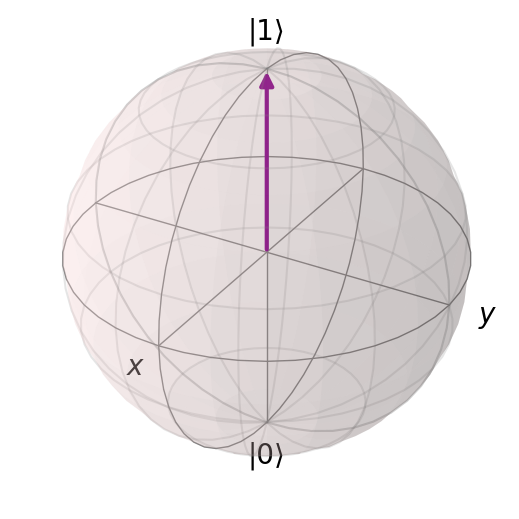

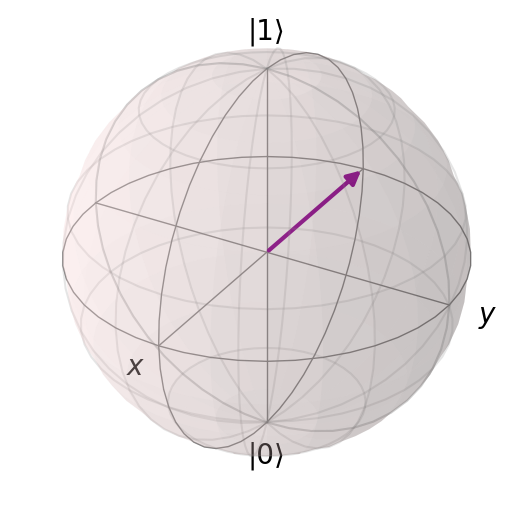

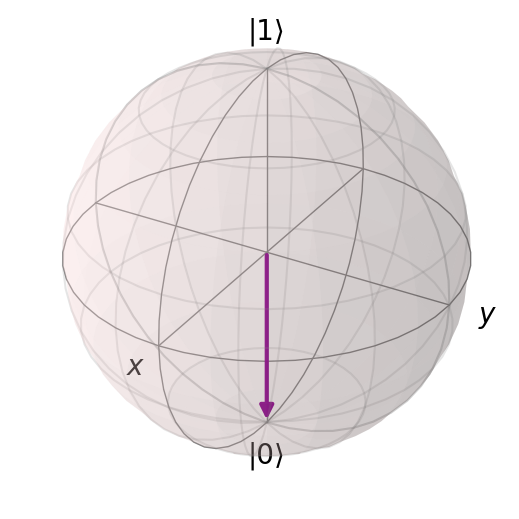

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Bloch, Bloch3d, basis

def plot_bloch(state):
    b = Bloch()
    b.add_states(state)
    b.vector_color = ['purple']
    #b.xlabel = ['+X', '-X']
    #b.ylabel = ['+Y', '-Y']
    b.zlabel = ['|1⟩', '|0⟩']
    b.render()
    b.show()


# Ground state |0> (points to the bottom)
state_0 = basis(2, 0)
plot_bloch(state_0)

# Superposition state (on the equator)
superposition_state = (-basis(2, 0) + basis(2, 1)).unit()
plot_bloch(superposition_state)

# Excited state |1> (points to the top)
state_1 = basis(2, 1)
plot_bloch(state_1)


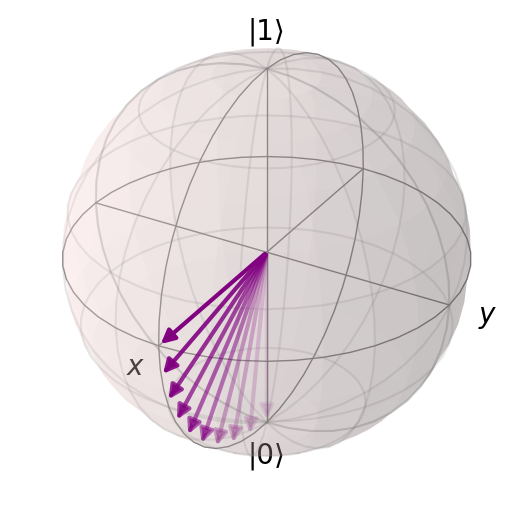

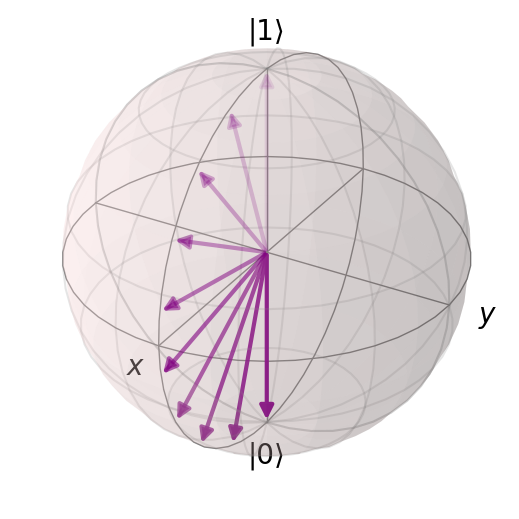

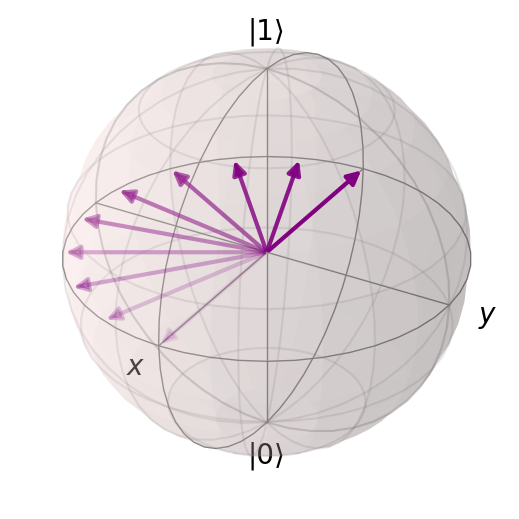

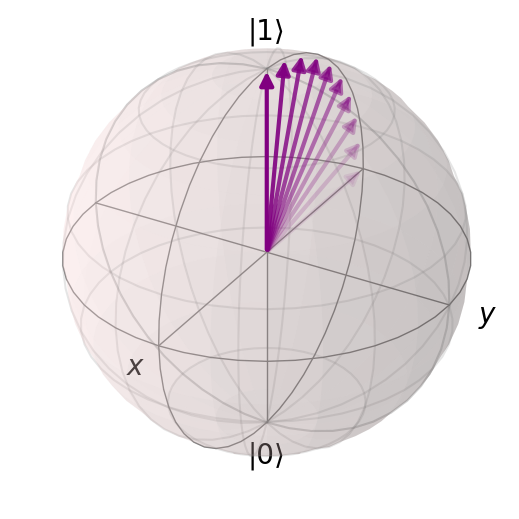

In [40]:
def plot_bloch_trajectory(states, show=True, filename=None):
    b = Bloch()
    num_states = len(states)
    for i, state in enumerate(states):
        alpha = (i + 1) / num_states  # Increasing opacity
        b.add_states(state, kind='vector', alpha=alpha)
    
    b.vector_color = ['purple']
    b.zlabel = ['|1⟩', '|0⟩']
    b.render()
    b.show()
    
    

# Generate trajectory from |0> to superposition state
num_steps = 10
states_1 = [(np.cos(-theta+np.pi/4) * basis(2, 0) - np.sin(-theta+np.pi/4) * basis(2, 1)).unit()
          for theta in np.linspace(0, np.pi / 4, num_steps)]

states_0 = [(np.cos(theta) * basis(2, 1) + np.sin(theta) * basis(2, 0)).unit()
          for theta in np.linspace(0, np.pi / 4, num_steps)]

states_01 = [(np.cos(theta) * basis(2, 0) + np.sin(theta) * basis(2, 1)).unit()
          for theta in np.linspace(0, np.pi/2, num_steps)]  # Half loop (from 0 to pi)

states_dephas = [( np.exp(1j*theta) * basis(2, 0) +  basis(2, 1)).unit()
          for theta in np.linspace(0, np.pi, num_steps)]  # Half loop (from 0 to pi)


print()
plot_bloch_trajectory(states_0)
plot_bloch_trajectory(states_01)
plot_bloch_trajectory(states_dephas)
plot_bloch_trajectory(states_1)